<a href="https://colab.research.google.com/github/jcardon/credit_card_fraud_detection/blob/master/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de Transacciones Fraudulentas

Gerencia de Auditoría de TI & Analíticos

El objetivo de este documento es detectar operaciones fraudulentas
del banco Dräxlmaier,



A continuación se presentara el código utilizado para manipular 
la información y las conclusiones a las que llegamos
después del análisis.



No contamos con transacciones marcadas como fraudulentas
por lo que no podemos utilizar algoritmos de aprendizaje de maquinas
para detectar el fraude, pero analizaremos los datos
y realizaremos un analisis exploratorio para conocer más 
sobre nuestros datos.

# Librerias necesarias:



# Cargamos nuestos archivos,

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime


%matplotlib inline


In [0]:

url = 'https://raw.githubusercontent.com/jcardon/credit_card_fraud_detection/master/Movtos_Ctas_2015.csv'
df1 = pd.read_csv(url,encoding='latin-1')

url = 'https://raw.githubusercontent.com/jcardon/credit_card_fraud_detection/master/Aperturas.csv'
df2 = pd.read_csv(url,encoding='latin-1')
# Dataset is now stored in a Pandas Dataframe

In [0]:
df_mov = df1
df_aperturas = df2


# Revisamos la forma de nuestros datasets

El documento de Aperturas contiene 5 columnas, 
la columna Numero_de_cuenta la comparte con 
el documento de Movimientos por lo que los podemos
unir tomando el no de cuenta como nuestra llave 

In [4]:
df_aperturas.head(5)

,Numero_de_cuenta,Monto_de_apertura,Fecha_Apertura,Cliente,Tipo_de_Instrumento
0,00MH985399,16046.40,3/6/2014,100540012,Cuenta corriente
1,00CU982321,379072.47,11/24/2014,100540013,Cuenta corriente
2,00CU982323,1603.86,2/12/2013,100540014,Cuenta corriente
3,00CU982324,3207.72,2/19/2013,100540015,Cuenta corriente
4,00CU982509,880377.46,9/9/2013,100540016,Cuenta corriente


In [5]:
df_mov.head(5)

,Numero_de_cuenta,Monto_transacción,Sucursal_nombre,Fecha_Transaccion,Hora_transaccion,Tipo_de_Transacción,Operador,Referencia
0,00BJ987645,409.29,BENITO JUÁREZ,6/15/2015,02:56:08 a. m.,DEFE,BJ1037,3064980
1,00BJ961410,525.00,BENITO JUÁREZ,6/10/2015,02:56:08 a. m.,RECJ,BJ1037,3064981
2,00BJ962496,1114475.13,BENITO JUÁREZ,5/27/2015,02:56:08 a. m.,DCHQ,BJ0104,3064982
3,00BJ980224,111483.75,BENITO JUÁREZ,5/9/2015,02:56:08 a. m.,DCHQ,BJ0105,3064983
4,00BJ962502,10533.54,BENITO JUÁREZ,5/5/2015,02:56:08 a. m.,DCHQ,BJ0109,3064984


Revisamos la forma de nuestros datasets

In [6]:
print(df_aperturas.shape)
print(df_mov.shape)


(6980, 5)
(65534, 8)


Observamos que el de movimientos es más grande, pero tiene sentido porque es lógico que 
por cada apertura de cuenta exista más de un movimiento


**Informacion estadistica de la casilla de Monto transaccion**
Observamos que el valor máximo es muy alto por lo que esperamos que la 
distribución este inclinada hacia la izquierda

In [7]:
df_mov.Monto_transacción.describe()


count    6.553400e+04
mean     3.193806e+05
std      1.673933e+07
min      0.000000e+00
25%      6.336000e+02
50%      2.875890e+03
75%      1.315455e+04
max      2.924383e+09
Name: Monto_transacción, dtype: float64

In [8]:
print(df_mov.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 8 columns):
Numero_de_cuenta       65534 non-null object
Monto_transacción      65534 non-null float64
Sucursal_nombre        65534 non-null object
Fecha_Transaccion      65528 non-null object
Hora_transaccion       65528 non-null object
Tipo_de_Transacción    65534 non-null object
Operador               65534 non-null object
Referencia             65534 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 4.0+ MB
None


# Limpieza de los datos

Empezamos revisando si existen valores NA en nuestros data sets

In [9]:
df_mov.isnull().any()

Numero_de_cuenta       False
Monto_transacción      False
Sucursal_nombre        False
Fecha_Transaccion       True
Hora_transaccion        True
Tipo_de_Transacción    False
Operador               False
Referencia             False
dtype: bool

***Detectamos NA en la casilla de Fecha y en la de Hora***

In [0]:
df = df_mov.dropna()

In [11]:
df.isnull().any()

Numero_de_cuenta       False
Monto_transacción      False
Sucursal_nombre        False
Fecha_Transaccion      False
Hora_transaccion       False
Tipo_de_Transacción    False
Operador               False
Referencia             False
dtype: bool

In [12]:
print (df.shape)
print (df_mov.shape)

(65528, 8)
(65534, 8)


**Podemos observar que el eliminar las transacciones sin fecha y hora no reduce mucho el dataset**

# Posibles transacciones fraudulentas
**Estas transacciones no contienen ni fecha ni hora por lo que seria recomendable examinarlas más a detalle**

In [13]:
df_mov[df_mov['Fecha_Transaccion'].isnull()]

,Numero_de_cuenta,Monto_transacción,Sucursal_nombre,Fecha_Transaccion,Hora_transaccion,Tipo_de_Transacción,Operador,Referencia
62757,00CU984227,2757.48,CUAUHTEMOC,NaN,NaN,DEFE,CU5056,3001871
62788,00CU962219,13583.70,CUAUHTEMOC,NaN,NaN,DCHQ,CU5052,3001902
62789,00CU980770,1200.00,CUAUHTEMOC,NaN,NaN,DEFE,CU5056,3001903
62790,00CU980883,5582.80,CUAUHTEMOC,NaN,NaN,DEFE,CU5029,3001904
62791,00CU980883,1861.04,CUAUHTEMOC,NaN,NaN,DEFE,CU5032,3001905
63775,00IP989289,526.24,IZTAPALAPA,NaN,NaN,DEFE,IP1047,3002889


# Analisis (cont)


continuamos trabajando con el Dataset df que ya no contiene los valores NA
por lo que el análisis es más consistente


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65528 entries, 0 to 65533
Data columns (total 8 columns):
Numero_de_cuenta       65528 non-null object
Monto_transacción      65528 non-null float64
Sucursal_nombre        65528 non-null object
Fecha_Transaccion      65528 non-null object
Hora_transaccion       65528 non-null object
Tipo_de_Transacción    65528 non-null object
Operador               65528 non-null object
Referencia             65528 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 4.5+ MB


**Como habiamos observado anteriormente, algunas transacciones son mucho más altas que el resto por lo 
que  la distribucion de las transacciones esta en 0**

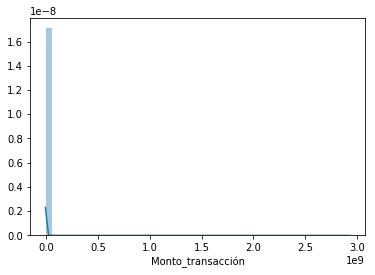

In [15]:
sns.distplot(df['Monto_transacción']);

In [16]:
df_cd = df
df_cd.head(5)

,Numero_de_cuenta,Monto_transacción,Sucursal_nombre,Fecha_Transaccion,Hora_transaccion,Tipo_de_Transacción,Operador,Referencia
0,00BJ987645,409.29,BENITO JUÁREZ,6/15/2015,02:56:08 a. m.,DEFE,BJ1037,3064980
1,00BJ961410,525.00,BENITO JUÁREZ,6/10/2015,02:56:08 a. m.,RECJ,BJ1037,3064981
2,00BJ962496,1114475.13,BENITO JUÁREZ,5/27/2015,02:56:08 a. m.,DCHQ,BJ0104,3064982
3,00BJ980224,111483.75,BENITO JUÁREZ,5/9/2015,02:56:08 a. m.,DCHQ,BJ0105,3064983
4,00BJ962502,10533.54,BENITO JUÁREZ,5/5/2015,02:56:08 a. m.,DCHQ,BJ0109,3064984


# Creamos un nuevo DS incluyendo Aperturas y Movimientos

Unimos los datasets mediante el Numero de cuenta por que es un atributo 
en común en ambos DS

In [0]:
df_cd = pd.merge(df_aperturas, df, how='inner', on = 'Numero_de_cuenta')

In [18]:
print(df_cd.shape)

(65518, 12)


Observamos que la figura del DS no cambio mucho por lo que podemos continuar con el analisis

# Creacion de Variables Dummies

Transformamos las variables categoricas de 
**Tipo de Instrumento**
y de 
**Tipo de Transaccion**
en columnas binarias (1,0) para facilitar el análisis
y poder trabajar con variables categoricas

In [0]:
cols_to_transform = [ 'Tipo_de_Instrumento',  'Tipo_de_Transacción', ]
df_with_dummies = pd.get_dummies(df_cd,columns = cols_to_transform )

In [20]:
df_with_dummies.head(5)

,Numero_de_cuenta,Monto_de_apertura,Fecha_Apertura,Cliente,Monto_transacción,Sucursal_nombre,Fecha_Transaccion,Hora_transaccion,Operador,Referencia,Tipo_de_Instrumento_Cuenta corriente,Tipo_de_Instrumento_Cuenta de ahorro,Tipo_de_Transacción_DCHQ,Tipo_de_Transacción_DEFE,Tipo_de_Transacción_RECJ,Tipo_de_Transacción_REVN
0,00MH985399,16046.40,3/6/2014,100540012,2386.56,MIGUEL HIDALGO,1/1/2015,09:23:18 a. m.,MH5507,3013311,1,0,0,1,0,0
1,00MH985399,16046.40,3/6/2014,100540012,13424.64,MIGUEL HIDALGO,4/22/2015,01:51:35 a. m.,MH5506,3010412,1,0,1,0,0,0
2,00MH985399,16046.40,3/6/2014,100540012,235.20,MIGUEL HIDALGO,6/16/2015,12:29:25 p. m.,MH5505,3006370,1,0,0,1,0,0
3,00CU982321,379072.47,11/24/2014,100540013,221932.08,CUAUHTEMOC,7/1/2015,10:13:31 a. m.,CU5021,3062323,1,0,1,0,0,0
4,00CU982321,379072.47,11/24/2014,100540013,4943.90,CUAUHTEMOC,6/26/2015,05:03:03 a. m.,CU5034,3059068,1,0,0,1,0,0


**Graficamos la distribucion de un tipo de instrumento para verificar que
la transformacion se haya realizado correctamente**

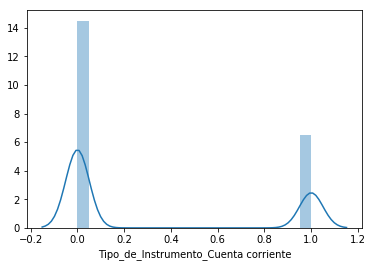

In [21]:
sns.distplot(df_with_dummies['Tipo_de_Instrumento_Cuenta corriente']);

# Transformación de fechas en texto a formato de DateTime


Observamos que las variables de Fecha de Apertura, Hora de Transacción y Fecha de 
Transacción estan en formato de texto por lo que las transformamos a Datetime para poder
realizar analisis con esas variables

In [22]:
df_cd.info()
df_time = df_cd

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65518 entries, 0 to 65517
Data columns (total 12 columns):
Numero_de_cuenta       65518 non-null object
Monto_de_apertura      65518 non-null float64
Fecha_Apertura         65518 non-null object
Cliente                65518 non-null int64
Tipo_de_Instrumento    65518 non-null object
Monto_transacción      65518 non-null float64
Sucursal_nombre        65518 non-null object
Fecha_Transaccion      65518 non-null object
Hora_transaccion       65518 non-null object
Tipo_de_Transacción    65518 non-null object
Operador               65518 non-null object
Referencia             65518 non-null int64
dtypes: float64(2), int64(2), object(8)
memory usage: 6.5+ MB


Creamos una columna en formato datetime

In [23]:
df_time['Fecha Transaccion'] = pd.to_datetime(df_time['Fecha_Transaccion'] + ' ' + df_time['Hora_transaccion'])
df_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65518 entries, 0 to 65517
Data columns (total 13 columns):
Numero_de_cuenta       65518 non-null object
Monto_de_apertura      65518 non-null float64
Fecha_Apertura         65518 non-null object
Cliente                65518 non-null int64
Tipo_de_Instrumento    65518 non-null object
Monto_transacción      65518 non-null float64
Sucursal_nombre        65518 non-null object
Fecha_Transaccion      65518 non-null object
Hora_transaccion       65518 non-null object
Tipo_de_Transacción    65518 non-null object
Operador               65518 non-null object
Referencia             65518 non-null int64
Fecha Transaccion      65518 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 7.0+ MB


In [24]:
df_time.head(5)

,Numero_de_cuenta,Monto_de_apertura,Fecha_Apertura,Cliente,Tipo_de_Instrumento,Monto_transacción,Sucursal_nombre,Fecha_Transaccion,Hora_transaccion,Tipo_de_Transacción,Operador,Referencia,Fecha Transaccion
0,00MH985399,16046.40,3/6/2014,100540012,Cuenta corriente,2386.56,MIGUEL HIDALGO,1/1/2015,09:23:18 a. m.,DEFE,MH5507,3013311,2015-01-01 09:23:18
1,00MH985399,16046.40,3/6/2014,100540012,Cuenta corriente,13424.64,MIGUEL HIDALGO,4/22/2015,01:51:35 a. m.,DCHQ,MH5506,3010412,2015-04-22 01:51:35
2,00MH985399,16046.40,3/6/2014,100540012,Cuenta corriente,235.20,MIGUEL HIDALGO,6/16/2015,12:29:25 p. m.,DEFE,MH5505,3006370,2015-06-16 12:29:25
3,00CU982321,379072.47,11/24/2014,100540013,Cuenta corriente,221932.08,CUAUHTEMOC,7/1/2015,10:13:31 a. m.,DCHQ,CU5021,3062323,2015-07-01 10:13:31
4,00CU982321,379072.47,11/24/2014,100540013,Cuenta corriente,4943.90,CUAUHTEMOC,6/26/2015,05:03:03 a. m.,DEFE,CU5034,3059068,2015-06-26 05:03:03


**Eliminamos las columnas de Fecha y Hora de transaccion originales**

In [0]:
df_time = df_time.drop(columns=['Fecha_Transaccion','Hora_transaccion'])

In [26]:
df_time.head(5)

,Numero_de_cuenta,Monto_de_apertura,Fecha_Apertura,Cliente,Tipo_de_Instrumento,Monto_transacción,Sucursal_nombre,Tipo_de_Transacción,Operador,Referencia,Fecha Transaccion
0,00MH985399,16046.40,3/6/2014,100540012,Cuenta corriente,2386.56,MIGUEL HIDALGO,DEFE,MH5507,3013311,2015-01-01 09:23:18
1,00MH985399,16046.40,3/6/2014,100540012,Cuenta corriente,13424.64,MIGUEL HIDALGO,DCHQ,MH5506,3010412,2015-04-22 01:51:35
2,00MH985399,16046.40,3/6/2014,100540012,Cuenta corriente,235.20,MIGUEL HIDALGO,DEFE,MH5505,3006370,2015-06-16 12:29:25
3,00CU982321,379072.47,11/24/2014,100540013,Cuenta corriente,221932.08,CUAUHTEMOC,DCHQ,CU5021,3062323,2015-07-01 10:13:31
4,00CU982321,379072.47,11/24/2014,100540013,Cuenta corriente,4943.90,CUAUHTEMOC,DEFE,CU5034,3059068,2015-06-26 05:03:03


# Transformamos Fecha de Apertura de str a DateTime

In [0]:
df_time['Fecha_Apertura'] = pd.to_datetime(df_time['Fecha_Apertura'])

In [28]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65518 entries, 0 to 65517
Data columns (total 11 columns):
Numero_de_cuenta       65518 non-null object
Monto_de_apertura      65518 non-null float64
Fecha_Apertura         65518 non-null datetime64[ns]
Cliente                65518 non-null int64
Tipo_de_Instrumento    65518 non-null object
Monto_transacción      65518 non-null float64
Sucursal_nombre        65518 non-null object
Tipo_de_Transacción    65518 non-null object
Operador               65518 non-null object
Referencia             65518 non-null int64
Fecha Transaccion      65518 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 6.0+ MB


**Podemos observar que ya todas nuestras columnas de fecha estan en formato Datetime por 
lo que ya podemos utilizarlas para analisis**

In [29]:
df_time.head(5)

,Numero_de_cuenta,Monto_de_apertura,Fecha_Apertura,Cliente,Tipo_de_Instrumento,Monto_transacción,Sucursal_nombre,Tipo_de_Transacción,Operador,Referencia,Fecha Transaccion
0,00MH985399,16046.40,2014-03-06,100540012,Cuenta corriente,2386.56,MIGUEL HIDALGO,DEFE,MH5507,3013311,2015-01-01 09:23:18
1,00MH985399,16046.40,2014-03-06,100540012,Cuenta corriente,13424.64,MIGUEL HIDALGO,DCHQ,MH5506,3010412,2015-04-22 01:51:35
2,00MH985399,16046.40,2014-03-06,100540012,Cuenta corriente,235.20,MIGUEL HIDALGO,DEFE,MH5505,3006370,2015-06-16 12:29:25
3,00CU982321,379072.47,2014-11-24,100540013,Cuenta corriente,221932.08,CUAUHTEMOC,DCHQ,CU5021,3062323,2015-07-01 10:13:31
4,00CU982321,379072.47,2014-11-24,100540013,Cuenta corriente,4943.90,CUAUHTEMOC,DEFE,CU5034,3059068,2015-06-26 05:03:03


Volvemos a crear variables dummies en nuestro nuevo DS

In [0]:
cols_to_transform = [ 'Tipo_de_Instrumento',  'Tipo_de_Transacción', ]
df_time_wdummies = pd.get_dummies(df_time,columns = cols_to_transform )

In [31]:
df_time_wdummies.head(5)

,Numero_de_cuenta,Monto_de_apertura,Fecha_Apertura,Cliente,Monto_transacción,Sucursal_nombre,Operador,Referencia,Fecha Transaccion,Tipo_de_Instrumento_Cuenta corriente,Tipo_de_Instrumento_Cuenta de ahorro,Tipo_de_Transacción_DCHQ,Tipo_de_Transacción_DEFE,Tipo_de_Transacción_RECJ,Tipo_de_Transacción_REVN
0,00MH985399,16046.40,2014-03-06,100540012,2386.56,MIGUEL HIDALGO,MH5507,3013311,2015-01-01 09:23:18,1,0,0,1,0,0
1,00MH985399,16046.40,2014-03-06,100540012,13424.64,MIGUEL HIDALGO,MH5506,3010412,2015-04-22 01:51:35,1,0,1,0,0,0
2,00MH985399,16046.40,2014-03-06,100540012,235.20,MIGUEL HIDALGO,MH5505,3006370,2015-06-16 12:29:25,1,0,0,1,0,0
3,00CU982321,379072.47,2014-11-24,100540013,221932.08,CUAUHTEMOC,CU5021,3062323,2015-07-01 10:13:31,1,0,1,0,0,0
4,00CU982321,379072.47,2014-11-24,100540013,4943.90,CUAUHTEMOC,CU5034,3059068,2015-06-26 05:03:03,1,0,0,1,0,0


# Validacion

Podemos observar que nuestras variables dummies son 
de tipo uint8 por lo que el uso de memoria se redujo,
también podemos observar que no hay valores
NA en nuestro dataset

In [32]:
df_time_wdummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65518 entries, 0 to 65517
Data columns (total 15 columns):
Numero_de_cuenta                        65518 non-null object
Monto_de_apertura                       65518 non-null float64
Fecha_Apertura                          65518 non-null datetime64[ns]
Cliente                                 65518 non-null int64
Monto_transacción                       65518 non-null float64
Sucursal_nombre                         65518 non-null object
Operador                                65518 non-null object
Referencia                              65518 non-null int64
Fecha Transaccion                       65518 non-null datetime64[ns]
Tipo_de_Instrumento_Cuenta corriente    65518 non-null uint8
Tipo_de_Instrumento_Cuenta de ahorro    65518 non-null uint8
Tipo_de_Transacción_DCHQ                65518 non-null uint8
Tipo_de_Transacción_DEFE                65518 non-null uint8
Tipo_de_Transacción_RECJ                65518 non-null uint8
Tipo_de_Tran

In [33]:
df_time_wdummies.isnull().any()

Numero_de_cuenta                        False
Monto_de_apertura                       False
Fecha_Apertura                          False
Cliente                                 False
Monto_transacción                       False
Sucursal_nombre                         False
Operador                                False
Referencia                              False
Fecha Transaccion                       False
Tipo_de_Instrumento_Cuenta corriente    False
Tipo_de_Instrumento_Cuenta de ahorro    False
Tipo_de_Transacción_DCHQ                False
Tipo_de_Transacción_DEFE                False
Tipo_de_Transacción_RECJ                False
Tipo_de_Transacción_REVN                False
dtype: bool

# Analisis de Transacciones

**Realizamos operaciones para 
determinar el monto promedio por instrumento
y por tipo de Transaccion**


In [0]:
cuenta_corriente = df_time_wdummies['Tipo_de_Instrumento_Cuenta corriente'].mean()
cuenta_de_ahorro = df_time_wdummies['Tipo_de_Instrumento_Cuenta de ahorro'].mean()
deposito_cheques = df_time_wdummies['Tipo_de_Transacción_DCHQ'].mean()
deposito_efectivo = df_time_wdummies['Tipo_de_Transacción_DEFE'].mean()
retiro_cajero = df_time_wdummies['Tipo_de_Transacción_RECJ'].mean()
retiro_ventanilla = df_time_wdummies['Tipo_de_Transacción_REVN'].mean()

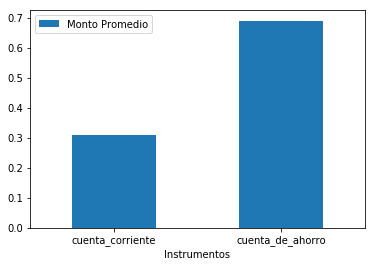

In [35]:
df_instrumentos = pd.DataFrame({'Instrumentos':['cuenta_corriente', 'cuenta_de_ahorro'], 'Monto Promedio':[cuenta_corriente, cuenta_de_ahorro]})
ax = df_instrumentos.plot.bar(x='Instrumentos', y='Monto Promedio', rot=0)

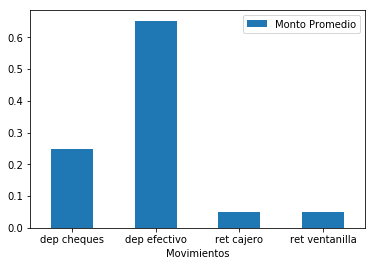

In [36]:
df_mvt = pd.DataFrame({'Movimientos':['dep cheques', 'dep efectivo','ret cajero','ret ventanilla'], 'Monto Promedio':[deposito_cheques,deposito_efectivo,retiro_cajero,retiro_ventanilla]})
ax = df_mvt.plot.bar(x='Movimientos', y='Monto Promedio', rot=0)

In [0]:
df = df_time_wdummies

# Eliminamos Variables que no son relevantes o que son redundantes

In [0]:
df = df.drop(columns='Cliente')

In [0]:
df = df.drop(columns='Operador')

In [0]:
df = df.drop(columns='Referencia')

# Transformamos la columna de Sucursal (categorica) en Dummies para poder realizar análisis con la variable

In [0]:
cols_to_transform = [ 'Sucursal_nombre' ]
df = pd.get_dummies(df,columns = cols_to_transform )

In [42]:
df.head(5)

,Numero_de_cuenta,Monto_de_apertura,Fecha_Apertura,Monto_transacción,Fecha Transaccion,Tipo_de_Instrumento_Cuenta corriente,Tipo_de_Instrumento_Cuenta de ahorro,Tipo_de_Transacción_DCHQ,Tipo_de_Transacción_DEFE,Tipo_de_Transacción_RECJ,Tipo_de_Transacción_REVN,Sucursal_nombre_BENITO JUÁREZ,Sucursal_nombre_COYOACÁN,Sucursal_nombre_CUAUHTEMOC,Sucursal_nombre_FORÁNEAS,Sucursal_nombre_IZTACALCO,Sucursal_nombre_IZTAPALAPA,Sucursal_nombre_MIGUEL HIDALGO
0,00MH985399,16046.40,2014-03-06,2386.56,2015-01-01 09:23:18,1,0,0,1,0,0,0,0,0,0,0,0,1
1,00MH985399,16046.40,2014-03-06,13424.64,2015-04-22 01:51:35,1,0,1,0,0,0,0,0,0,0,0,0,1
2,00MH985399,16046.40,2014-03-06,235.20,2015-06-16 12:29:25,1,0,0,1,0,0,0,0,0,0,0,0,1
3,00CU982321,379072.47,2014-11-24,221932.08,2015-07-01 10:13:31,1,0,1,0,0,0,0,0,1,0,0,0,0
4,00CU982321,379072.47,2014-11-24,4943.90,2015-06-26 05:03:03,1,0,0,1,0,0,0,0,1,0,0,0,0


# feature engineering

**A partir de las variables que tenemos podemos crear nuevas que contengan mas 
informacion y que nos sean relevantes para entender los datos**

In [0]:
#dias desde que abrieron la cuenta
df['dias_desde_apertura'] = df['Fecha Transaccion'] - df['Fecha_Apertura']

In [0]:
df['dias_desde_apertura'] = df['dias_desde_apertura'].astype('timedelta64[D]')


***Creamos una variable que indica cuanto tiempo ha pasado desde la última transacción del usuario***

In [0]:
df['dias_desde_ultima_tx'] = df.sort_values(['Numero_de_cuenta','Fecha Transaccion']).groupby('Numero_de_cuenta')['Fecha Transaccion'].diff()
df['dias_desde_ultima_tx'] = df['dias_desde_ultima_tx'].astype('timedelta64[D]')

In [46]:
df.head(5)

,Numero_de_cuenta,Monto_de_apertura,Fecha_Apertura,Monto_transacción,Fecha Transaccion,Tipo_de_Instrumento_Cuenta corriente,Tipo_de_Instrumento_Cuenta de ahorro,Tipo_de_Transacción_DCHQ,Tipo_de_Transacción_DEFE,Tipo_de_Transacción_RECJ,Tipo_de_Transacción_REVN,Sucursal_nombre_BENITO JUÁREZ,Sucursal_nombre_COYOACÁN,Sucursal_nombre_CUAUHTEMOC,Sucursal_nombre_FORÁNEAS,Sucursal_nombre_IZTACALCO,Sucursal_nombre_IZTAPALAPA,Sucursal_nombre_MIGUEL HIDALGO,dias_desde_apertura,dias_desde_ultima_tx
0,00MH985399,16046.40,2014-03-06,2386.56,2015-01-01 09:23:18,1,0,0,1,0,0,0,0,0,0,0,0,1,301.0,NaN
1,00MH985399,16046.40,2014-03-06,13424.64,2015-04-22 01:51:35,1,0,1,0,0,0,0,0,0,0,0,0,1,412.0,110.0
2,00MH985399,16046.40,2014-03-06,235.20,2015-06-16 12:29:25,1,0,0,1,0,0,0,0,0,0,0,0,1,467.0,55.0
3,00CU982321,379072.47,2014-11-24,221932.08,2015-07-01 10:13:31,1,0,1,0,0,0,0,0,1,0,0,0,0,219.0,5.0
4,00CU982321,379072.47,2014-11-24,4943.90,2015-06-26 05:03:03,1,0,0,1,0,0,0,0,1,0,0,0,0,214.0,4.0


Creamos un df con las variables que no son numericas para poder unirlo mas tarde despues de la normalizacion

In [0]:
df_cat = df[['Numero_de_cuenta','Fecha_Apertura','Fecha Transaccion']]

In [48]:
df_cat.head(5)

,Numero_de_cuenta,Fecha_Apertura,Fecha Transaccion
0,00MH985399,2014-03-06,2015-01-01 09:23:18
1,00MH985399,2014-03-06,2015-04-22 01:51:35
2,00MH985399,2014-03-06,2015-06-16 12:29:25
3,00CU982321,2014-11-24,2015-07-01 10:13:31
4,00CU982321,2014-11-24,2015-06-26 05:03:03


In [0]:
df = df.fillna(0)

reemplazamos los NA por 0

In [50]:
df.head(5)

,Numero_de_cuenta,Monto_de_apertura,Fecha_Apertura,Monto_transacción,Fecha Transaccion,Tipo_de_Instrumento_Cuenta corriente,Tipo_de_Instrumento_Cuenta de ahorro,Tipo_de_Transacción_DCHQ,Tipo_de_Transacción_DEFE,Tipo_de_Transacción_RECJ,Tipo_de_Transacción_REVN,Sucursal_nombre_BENITO JUÁREZ,Sucursal_nombre_COYOACÁN,Sucursal_nombre_CUAUHTEMOC,Sucursal_nombre_FORÁNEAS,Sucursal_nombre_IZTACALCO,Sucursal_nombre_IZTAPALAPA,Sucursal_nombre_MIGUEL HIDALGO,dias_desde_apertura,dias_desde_ultima_tx
0,00MH985399,16046.40,2014-03-06,2386.56,2015-01-01 09:23:18,1,0,0,1,0,0,0,0,0,0,0,0,1,301.0,0.0
1,00MH985399,16046.40,2014-03-06,13424.64,2015-04-22 01:51:35,1,0,1,0,0,0,0,0,0,0,0,0,1,412.0,110.0
2,00MH985399,16046.40,2014-03-06,235.20,2015-06-16 12:29:25,1,0,0,1,0,0,0,0,0,0,0,0,1,467.0,55.0
3,00CU982321,379072.47,2014-11-24,221932.08,2015-07-01 10:13:31,1,0,1,0,0,0,0,0,1,0,0,0,0,219.0,5.0
4,00CU982321,379072.47,2014-11-24,4943.90,2015-06-26 05:03:03,1,0,0,1,0,0,0,0,1,0,0,0,0,214.0,4.0



# feature engineering
Creamos variables que indican el numero total de transacciones por tipo de instrumento para cada usuario.

In [0]:
cta_cc = df.groupby(['Numero_de_cuenta'])['Tipo_de_Instrumento_Cuenta corriente'].agg('sum')

In [0]:
cta_ah = df.groupby(['Numero_de_cuenta'])['Tipo_de_Instrumento_Cuenta de ahorro'].agg('sum')

In [0]:
df['cta c tot'] = df['Numero_de_cuenta'].map(cta_cc)

In [0]:
df['cta_de_ahorro'] = df['Numero_de_cuenta'].map(cta_ah)

In [55]:
list(df)

['Numero_de_cuenta',
 'Monto_de_apertura',
 'Fecha_Apertura',
 'Monto_transacción',
 'Fecha Transaccion',
 'Tipo_de_Instrumento_Cuenta corriente',
 'Tipo_de_Instrumento_Cuenta de ahorro',
 'Tipo_de_Transacción_DCHQ',
 'Tipo_de_Transacción_DEFE',
 'Tipo_de_Transacción_RECJ',
 'Tipo_de_Transacción_REVN',
 'Sucursal_nombre_BENITO JUÁREZ',
 'Sucursal_nombre_COYOACÁN',
 'Sucursal_nombre_CUAUHTEMOC',
 'Sucursal_nombre_FORÁNEAS',
 'Sucursal_nombre_IZTACALCO',
 'Sucursal_nombre_IZTAPALAPA',
 'Sucursal_nombre_MIGUEL HIDALGO',
 'dias_desde_apertura',
 'dias_desde_ultima_tx',
 'cta c tot',
 'cta_de_ahorro']

In [56]:
df.head(5)

,Numero_de_cuenta,Monto_de_apertura,Fecha_Apertura,Monto_transacción,Fecha Transaccion,Tipo_de_Instrumento_Cuenta corriente,Tipo_de_Instrumento_Cuenta de ahorro,Tipo_de_Transacción_DCHQ,Tipo_de_Transacción_DEFE,Tipo_de_Transacción_RECJ,Tipo_de_Transacción_REVN,Sucursal_nombre_BENITO JUÁREZ,Sucursal_nombre_COYOACÁN,Sucursal_nombre_CUAUHTEMOC,Sucursal_nombre_FORÁNEAS,Sucursal_nombre_IZTACALCO,Sucursal_nombre_IZTAPALAPA,Sucursal_nombre_MIGUEL HIDALGO,dias_desde_apertura,dias_desde_ultima_tx,cta c tot,cta_de_ahorro
0,00MH985399,16046.40,2014-03-06,2386.56,2015-01-01 09:23:18,1,0,0,1,0,0,0,0,0,0,0,0,1,301.0,0.0,3.0,0.0
1,00MH985399,16046.40,2014-03-06,13424.64,2015-04-22 01:51:35,1,0,1,0,0,0,0,0,0,0,0,0,1,412.0,110.0,3.0,0.0
2,00MH985399,16046.40,2014-03-06,235.20,2015-06-16 12:29:25,1,0,0,1,0,0,0,0,0,0,0,0,1,467.0,55.0,3.0,0.0
3,00CU982321,379072.47,2014-11-24,221932.08,2015-07-01 10:13:31,1,0,1,0,0,0,0,0,1,0,0,0,0,219.0,5.0,13.0,0.0
4,00CU982321,379072.47,2014-11-24,4943.90,2015-06-26 05:03:03,1,0,0,1,0,0,0,0,1,0,0,0,0,214.0,4.0,13.0,0.0


# feature engineering (cont.)

Creamos las siguientes variables 


> Una variable que indica el monto promedio por Transaccion para cada usuario


> Una variable que indica la diferencia entre la transaccion actual y el monto promedio por transaccion





In [0]:
mean_user = df.groupby(['Numero_de_cuenta'])['Monto_transacción'].mean()
df['Promedio_de_Tx_por_usuario'] = df['Numero_de_cuenta'].map(mean_user)

In [58]:
df.head(5)

,Numero_de_cuenta,Monto_de_apertura,Fecha_Apertura,Monto_transacción,Fecha Transaccion,Tipo_de_Instrumento_Cuenta corriente,Tipo_de_Instrumento_Cuenta de ahorro,Tipo_de_Transacción_DCHQ,Tipo_de_Transacción_DEFE,Tipo_de_Transacción_RECJ,Tipo_de_Transacción_REVN,Sucursal_nombre_BENITO JUÁREZ,Sucursal_nombre_COYOACÁN,Sucursal_nombre_CUAUHTEMOC,Sucursal_nombre_FORÁNEAS,Sucursal_nombre_IZTACALCO,Sucursal_nombre_IZTAPALAPA,Sucursal_nombre_MIGUEL HIDALGO,dias_desde_apertura,dias_desde_ultima_tx,cta c tot,cta_de_ahorro,Promedio_de_Tx_por_usuario
0,00MH985399,16046.40,2014-03-06,2386.56,2015-01-01 09:23:18,1,0,0,1,0,0,0,0,0,0,0,0,1,301.0,0.0,3.0,0.0,5348.800000
1,00MH985399,16046.40,2014-03-06,13424.64,2015-04-22 01:51:35,1,0,1,0,0,0,0,0,0,0,0,0,1,412.0,110.0,3.0,0.0,5348.800000
2,00MH985399,16046.40,2014-03-06,235.20,2015-06-16 12:29:25,1,0,0,1,0,0,0,0,0,0,0,0,1,467.0,55.0,3.0,0.0,5348.800000
3,00CU982321,379072.47,2014-11-24,221932.08,2015-07-01 10:13:31,1,0,1,0,0,0,0,0,1,0,0,0,0,219.0,5.0,13.0,0.0,29321.845385
4,00CU982321,379072.47,2014-11-24,4943.90,2015-06-26 05:03:03,1,0,0,1,0,0,0,0,1,0,0,0,0,214.0,4.0,13.0,0.0,29321.845385


In [0]:
df['diff con tx promedio'] = df['Monto_transacción'] - df['Promedio_de_Tx_por_usuario']

In [60]:
df.head(5)

,Numero_de_cuenta,Monto_de_apertura,Fecha_Apertura,Monto_transacción,Fecha Transaccion,Tipo_de_Instrumento_Cuenta corriente,Tipo_de_Instrumento_Cuenta de ahorro,Tipo_de_Transacción_DCHQ,Tipo_de_Transacción_DEFE,Tipo_de_Transacción_RECJ,Tipo_de_Transacción_REVN,Sucursal_nombre_BENITO JUÁREZ,Sucursal_nombre_COYOACÁN,Sucursal_nombre_CUAUHTEMOC,Sucursal_nombre_FORÁNEAS,Sucursal_nombre_IZTACALCO,Sucursal_nombre_IZTAPALAPA,Sucursal_nombre_MIGUEL HIDALGO,dias_desde_apertura,dias_desde_ultima_tx,cta c tot,cta_de_ahorro,Promedio_de_Tx_por_usuario,diff con tx promedio
0,00MH985399,16046.40,2014-03-06,2386.56,2015-01-01 09:23:18,1,0,0,1,0,0,0,0,0,0,0,0,1,301.0,0.0,3.0,0.0,5348.800000,-2962.240000
1,00MH985399,16046.40,2014-03-06,13424.64,2015-04-22 01:51:35,1,0,1,0,0,0,0,0,0,0,0,0,1,412.0,110.0,3.0,0.0,5348.800000,8075.840000
2,00MH985399,16046.40,2014-03-06,235.20,2015-06-16 12:29:25,1,0,0,1,0,0,0,0,0,0,0,0,1,467.0,55.0,3.0,0.0,5348.800000,-5113.600000
3,00CU982321,379072.47,2014-11-24,221932.08,2015-07-01 10:13:31,1,0,1,0,0,0,0,0,1,0,0,0,0,219.0,5.0,13.0,0.0,29321.845385,192610.234615
4,00CU982321,379072.47,2014-11-24,4943.90,2015-06-26 05:03:03,1,0,0,1,0,0,0,0,1,0,0,0,0,214.0,4.0,13.0,0.0,29321.845385,-24377.945385


In [0]:
df_nm = df

# Normalizacion de los datos

Primero eliminamos las columnas de tipo 'objeto' 
y aplicamos un algoritmo de normalización
llamado MinMax

Para cada valor en cada atrubuto MinMaxScaler resta el valor 
minimo del atritbuto y luego lo divide por el rango.
El rango es la diferencia entre el maximo original y el minimo orignal

Usamos MinMaxScaler por que preserva la forma original de la
distribución y por que no cambia significativamente la 
información contenida originalmente en nuestros datos

Otra razón es que MinMaxScaler no reduce la importancia de los outliers y en nuestro caso no queremos perder
esa información por que es justo lo que nos interesa

El rango por defecto que regresa MinMaxScaler es de 0 a 1


In [0]:
i = ['Numero_de_cuenta','Fecha Transaccion', 'Fecha_Apertura']
df_nm = df_nm.drop(columns=i)

In [0]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(df_nm)
df_MinMax = pd.DataFrame(X_train_minmax, columns=[['Monto_de_apertura',
 'Monto_transacción',
 'Tipo_de_Instrumento_Cuenta corriente',
 'Tipo_de_Instrumento_Cuenta de ahorro',
 'Tipo_de_Transacción_DCHQ',
 'Tipo_de_Transacción_DEFE',
 'Tipo_de_Transacción_RECJ',
 'Tipo_de_Transacción_REVN',
 'Sucursal_nombre_BENITO JUÁREZ',
 'Sucursal_nombre_COYOACÁN',
 'Sucursal_nombre_CUAUHTEMOC',
 'Sucursal_nombre_FORÁNEAS',
 'Sucursal_nombre_IZTACALCO',
 'Sucursal_nombre_IZTAPALAPA',
 'Sucursal_nombre_MIGUEL HIDALGO',
 'dias_desde_apertura',
 'dias_desde_ultima_tx',
 'cta c tot',
 'cta_de_ahorro',
 'Promedio_de_Tx_por_usuario',
 'diff con tx promedio']])

In [64]:
list(df_nm)

['Monto_de_apertura',
 'Monto_transacción',
 'Tipo_de_Instrumento_Cuenta corriente',
 'Tipo_de_Instrumento_Cuenta de ahorro',
 'Tipo_de_Transacción_DCHQ',
 'Tipo_de_Transacción_DEFE',
 'Tipo_de_Transacción_RECJ',
 'Tipo_de_Transacción_REVN',
 'Sucursal_nombre_BENITO JUÁREZ',
 'Sucursal_nombre_COYOACÁN',
 'Sucursal_nombre_CUAUHTEMOC',
 'Sucursal_nombre_FORÁNEAS',
 'Sucursal_nombre_IZTACALCO',
 'Sucursal_nombre_IZTAPALAPA',
 'Sucursal_nombre_MIGUEL HIDALGO',
 'dias_desde_apertura',
 'dias_desde_ultima_tx',
 'cta c tot',
 'cta_de_ahorro',
 'Promedio_de_Tx_por_usuario',
 'diff con tx promedio']

In [65]:
X_train_minmax

array([[2.43914260e-01, 8.16090040e-07, 1.00000000e+00, ...,
        0.00000000e+00, 2.55870733e-05, 7.14814991e-02],
       [2.43914260e-01, 4.59058854e-06, 1.00000000e+00, ...,
        0.00000000e+00, 2.55870733e-05, 7.14852736e-02],
       [2.43914260e-01, 8.04272163e-08, 1.00000000e+00, ...,
        0.00000000e+00, 2.55870733e-05, 7.14807634e-02],
       ...,
       [2.43910599e-01, 6.41502797e-07, 0.00000000e+00, ...,
        4.75059382e-04, 8.97422777e-06, 7.14825121e-02],
       [2.43910334e-01, 2.90351826e-07, 0.00000000e+00, ...,
        4.75059382e-04, 4.06184264e-06, 7.14825121e-02],
       [2.43910323e-01, 2.76913094e-07, 0.00000000e+00, ...,
        4.75059382e-04, 3.87384309e-06, 7.14825121e-02]])

# DataFrame MinMaxScale

Obtenemos nuestro data frame ya normalizado 
por lo que si contaramos con informacion
sobre transacciones fraudulentas
ya podriamos utilizar nuestros datos para generar un modelo



In [66]:
df_MinMax.head(5)

,Monto_de_apertura,Monto_transacción,Tipo_de_Instrumento_Cuenta corriente,Tipo_de_Instrumento_Cuenta de ahorro,Tipo_de_Transacción_DCHQ,Tipo_de_Transacción_DEFE,Tipo_de_Transacción_RECJ,Tipo_de_Transacción_REVN,Sucursal_nombre_BENITO JUÁREZ,Sucursal_nombre_COYOACÁN,Sucursal_nombre_CUAUHTEMOC,Sucursal_nombre_FORÁNEAS,Sucursal_nombre_IZTACALCO,Sucursal_nombre_IZTAPALAPA,Sucursal_nombre_MIGUEL HIDALGO,dias_desde_apertura,dias_desde_ultima_tx,cta c tot,cta_de_ahorro,Promedio_de_Tx_por_usuario,diff con tx promedio
0,0.243914,8.160900e-07,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.982677,0.000000,0.003827,0.0,0.000026,0.071481
1,0.243914,4.590589e-06,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.985262,0.002619,0.003827,0.0,0.000026,0.071485
2,0.243914,8.042722e-08,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.986542,0.001309,0.003827,0.0,0.000026,0.071481
3,0.244008,7.589022e-05,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.980768,0.000119,0.016582,0.0,0.000140,0.071548
4,0.244008,1.690579e-06,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.980651,0.000095,0.016582,0.0,0.000140,0.071474


# Original vs Normalizado (MinMaxScale)


Podemos obserar que la distribución de nuestros
atributos no se vio afectada de forma significativa
por lo que aún contamos con 
representaciones fieles de nuestros datos

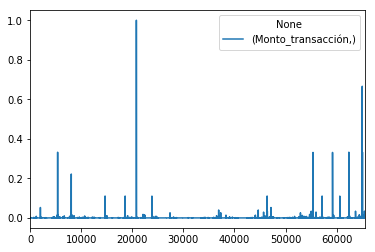

In [67]:
df_MinMax['Monto_transacción'].plot()

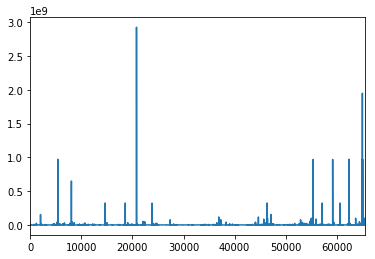

In [68]:
df_nm['Monto_transacción'].plot()

# Principal Component Analysis PCA

Principal Component Analysis o PCA, es un 
metódo de reducción de dimension que es 
usado frencuentemente en datasets grandes
para transformar un set largo de variables en uno más pequeño 
pero que aún contenga la información del DS original


No podemos hacer más análisis con PCA
por que no contamos con un data set de test pero 
podemos crear nuestro DataFrame que 
tenga los nuevos atributos que incluyan la información relevante.

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_MinMax)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [70]:
principalDf.head(5)

,principal component 1,principal component 2
0,0.791771,-0.540458
1,0.781645,0.850267
2,0.791769,-0.540458
3,0.986595,1.033031
4,0.996720,-0.357694


# Creacion de dataframe que incluya Num de cuenta, fechas y atributos normalizados


In [0]:
df_norm_id = df_cat.merge(df_MinMax, left_index=True, right_index=True )

In [72]:
df_norm_id.head(5)

,Numero_de_cuenta,Fecha_Apertura,Fecha Transaccion,"(Monto_de_apertura,)","(Monto_transacción,)","(Tipo_de_Instrumento_Cuenta corriente,)","(Tipo_de_Instrumento_Cuenta de ahorro,)","(Tipo_de_Transacción_DCHQ,)","(Tipo_de_Transacción_DEFE,)","(Tipo_de_Transacción_RECJ,)","(Tipo_de_Transacción_REVN,)","(Sucursal_nombre_BENITO JUÁREZ,)","(Sucursal_nombre_COYOACÁN,)","(Sucursal_nombre_CUAUHTEMOC,)","(Sucursal_nombre_FORÁNEAS,)","(Sucursal_nombre_IZTACALCO,)","(Sucursal_nombre_IZTAPALAPA,)","(Sucursal_nombre_MIGUEL HIDALGO,)","(dias_desde_apertura,)","(dias_desde_ultima_tx,)","(cta c tot,)","(cta_de_ahorro,)","(Promedio_de_Tx_por_usuario,)","(diff con tx promedio,)"
0,00MH985399,2014-03-06,2015-01-01 09:23:18,0.243914,8.160900e-07,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.982677,0.000000,0.003827,0.0,0.000026,0.071481
1,00MH985399,2014-03-06,2015-04-22 01:51:35,0.243914,4.590589e-06,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.985262,0.002619,0.003827,0.0,0.000026,0.071485
2,00MH985399,2014-03-06,2015-06-16 12:29:25,0.243914,8.042722e-08,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.986542,0.001309,0.003827,0.0,0.000026,0.071481
3,00CU982321,2014-11-24,2015-07-01 10:13:31,0.244008,7.589022e-05,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.980768,0.000119,0.016582,0.0,0.000140,0.071548
4,00CU982321,2014-11-24,2015-06-26 05:03:03,0.244008,1.690579e-06,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.980651,0.000095,0.016582,0.0,0.000140,0.071474


# Grafica de coorrelación de matrices

Si tienes un dataset con muchos atribuutos, una buena forma de revisar rapidamente
la correlación entre las variables es mediante la visualización
de una matriz de coorrelación como un mapa de calor

Azul significa coorrelación positiva y rojo coorrelación negativa
entre más fuerte el color más fuerte es la coorrelación

No existe mucha coorrelación entre las variables
lo cual es de esperarse debido a la falta de variable 
objetivo para encajar los datos en relación a eso.



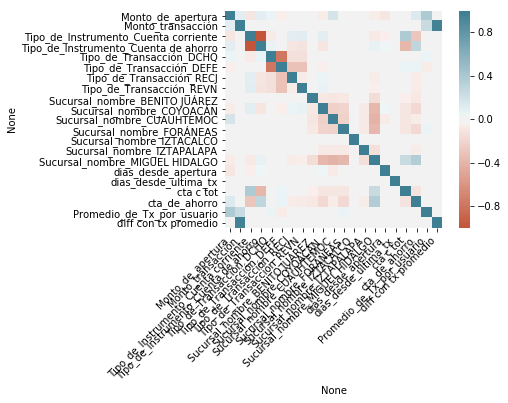

In [73]:
corr = df_MinMax.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Horas del día con más transacciones

nos es útil revisar las horas del día donde hay más transacciones
para entender mejor nuestros datos 
y encontrar posibles relaciones

In [0]:
df_norm_id['Fecha Transaccion'] = pd.to_datetime(df_norm_id['Fecha Transaccion']).dt.hour


In [0]:
df_vis = df_norm_id[['Fecha Transaccion',('Monto_transacción',)]]

Text(0, 0.5, 'No Of Transactions')

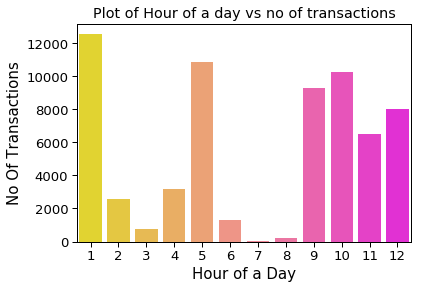

In [76]:
sns.set_context('paper', font_scale=1.5, rc={'font.size':1,'axes.labelsize':15})
pl=sns.countplot(x='Fecha Transaccion', data=df_vis,palette='spring_r')
pl.set_title('Plot of Hour of a day vs no of transactions')
pl.set_xlabel('Hour of a Day')
pl.set_ylabel('No Of Transactions')

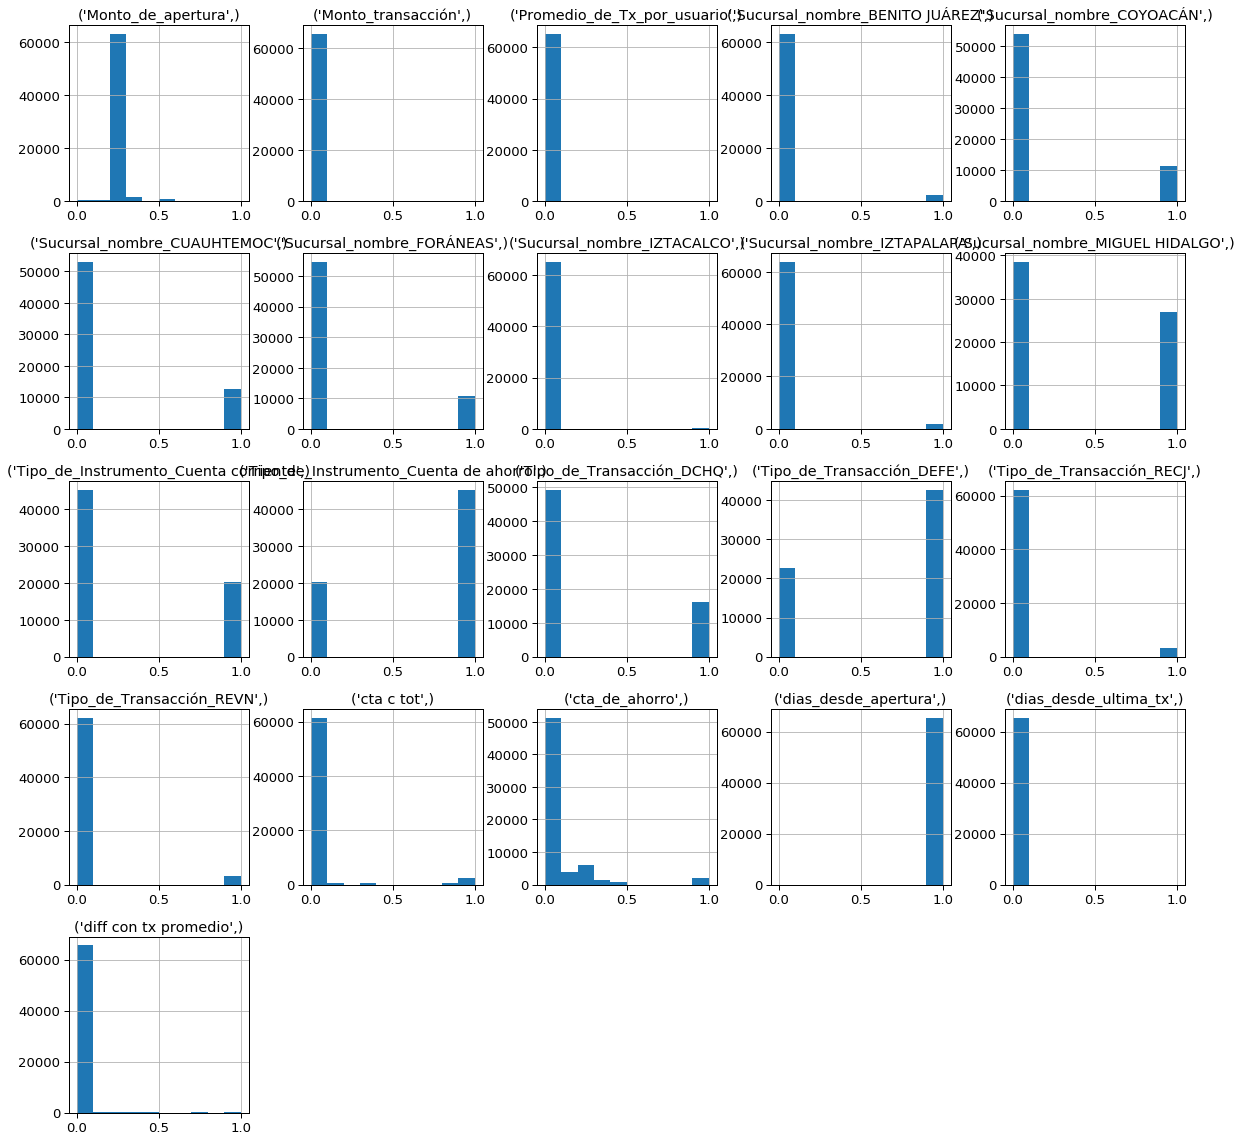

In [77]:
df_MinMax.hist(figsize=(20,20))
plt.show()

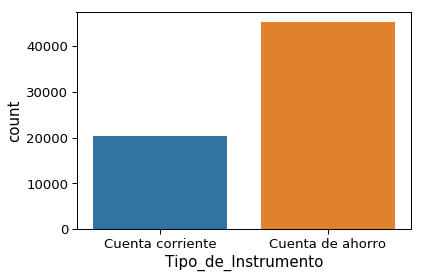

In [79]:
sns.countplot(x='Tipo_de_Instrumento',data=df_time)

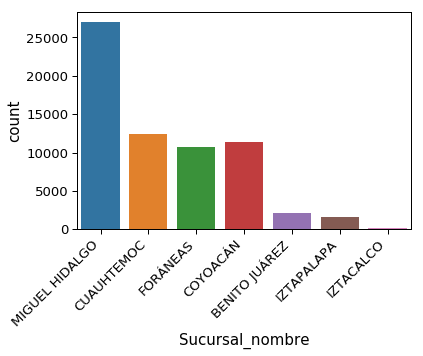

In [80]:
sucursal = df_time['Sucursal_nombre']
ax = sns.countplot(
    sucursal, 
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

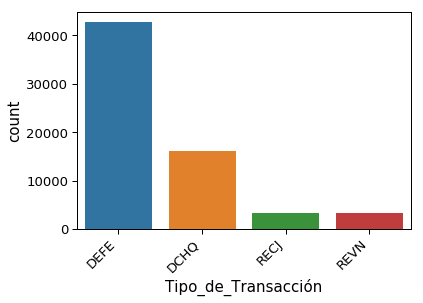

In [81]:
sucursal = df_time['Tipo_de_Transacción']
ax = sns.countplot(
    sucursal, 
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Conclusión General

La calidad de nuestros datos es buena y contamos con columnas 
importantes que pueden ayudar a generar nuevos atributos que 
pueden ser relevantes a la hora de buscar transacciones fraudulentas.

Por la falta de transacciones clasificadas como fraudulentas no podemos
generar algoritmos que aprendan a detectar esas operaciones.
Sin embargo, detectamos que hubo transacciones que llaman la atención 
a primera vista como los que no tenían fecha, ese tipo de transacciones 
son candidatas a ser fraudelentas.

Detectamos que los montos de transacciones varían mucho y que hay 
algunos clientes que realizan la mayoría de las operaciones
y por la mayor cantidad de dinero.


Otro atributo interesante sería el de detectar cuanto tiempo pasa
entre una transacción en el banco 'a' a una transacción en el banco 'b', ya que 
sería difícil que una persona realice una operación en dos bancos que esten alejados
al mismo tiempo.

Tambien concluimos que para poder procesar los datos y comparar las distintas 
categorías entre sí, es muy importante normalizar los valores para que puedan
ser comparables y que el modelo funcione